# Logistic Regression


Logistic regression is a statistical model for probability of a binary (Bernoulli) event given the feature variables that explain the event. This can be extended to more classes by determining the probability of each class between 0 and q while the summation adds up to 1.

Logistic regression is a classifier that uses a logistic (logit) function to map a probability between 0 and 1 to a value between $-\infty$ and $\infty$. 

In order to understand logistic regression, consider a model with two predictors/features and one binary response variable $Y$. We assume a linear relationship between the predictor variables and the log-odds (logit) of the event $Y=1$. 

$ l = log_e (\frac{P}{1-P}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

Note that $log_e (\frac{P}{1-P})$ transforms the probability values between 0 and 1 to $-\infty$ and $\infty$.

$P = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$

In general, for a linear cases:

$P = \frac{1}{1+e^{-(w x +b )}}$

The interpretation of the logistic regression with a linear relationship for predictors ore linear classifier (i.e. $wx+b$) is that the hyper plane defined by $ wx+b = 0$ is the decision boundary for the binary event $Y$ as on that plane, the probability of $Y=1$ is 0.5. Given such interpretation, we could define the probability given the model of the hyper plane. In this context, we need a mapping function to convert the linear function $wx + b$ to probability of $Y = 1$ in a way that:

    - The probability increases as the linear function grows and vice versa
    - Is 50% when the linear function 
    
The mapping function is the squashing function $\frac{1}{1+exp(-z)}$. Thus, $P = \frac{1}{1+e^{-(w x +b )}}$

In [1]:
from matplotlib import pyplot as plt
import numpy as np

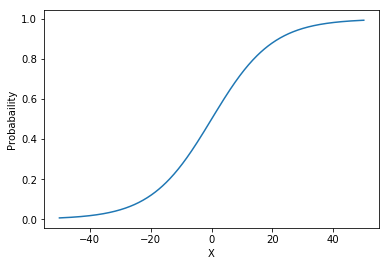

In [2]:
x = np.linspace(-50,50,500)
y = 1/(1+np.exp(-0.1*x))

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X'); ax.set_ylabel('Probabaility')
ax.plot(x,y)

For a binary case, probability of $Y \ne 1$ is

$1 - \frac{1}{1+e^{-(w x +b )}} = \frac{e^{-(w x +b )}}{1+e^{-(w x +b )}} = \frac{1}{1+e^{(w x +b )}}$

We can integrate $Y$ binary value (i.e. y) in the definition of probability by considering $ y \in \{1, -1\}$. With $x \in R^d$ and binary labels $y \in \{1, -1\}$, we need to find parameters $w \in R^d$ and $b \in R$:

$P(y|x) = \frac{1}{1+e^{-y(w.x +b )}}$

The learning process is based on maximum likelihood principle give the $n$ data observations $(x^{(1)}, y^{(1)}), ..., (x^{(n)}, y^{(n)})$ to pick $w \in R^d$ and $b \in R$ to maximize the likelihood 

$\prod_{i = 1}^{n} P(y^{(i)}| x^{(i)})$ 
    
In order to simplify this, log likelihood will be used to get the summation and a negative will be added to minimize the function to get the maximum likelihood. So, the loss function is given by

$L(w, b) = - \sum_{i=1}^{n} ln ( P(y^{(i)}| x^{(i)})) = \sum_{i=1}^{n} ln( 1+e^{-y^i(w.x^i +b )} )$

    Note that b can be integrated into w vector by adding a vector of ones to the feature. Similar to multiple linear regression solution.

Since there is no closed form solution, gradient descent or one of its derivatives can be used to minimize the loss function and find the weights and bias/intercept value. The solution is convex so there is no concern about local optimal points.

- Initial guess for w i.e. $w_0$
- Iterations of moving with a step size ($\eta$) in reverse of the gradient vector to minimize the loss function.

    $w_{t+1} = w_t + \eta_t \sum_{i=1}^{n} y^{(i)} x^{(i)} P(y^{(i)}|x^{(i)})$ 

# Example

In [3]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame

## Create a random data set

a simple example with two features and a binary classification

Text(0,0.5,'variable 2')

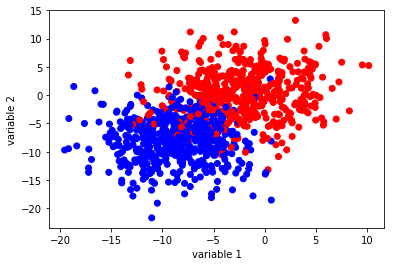

In [4]:
n_samples=1000
X, y = make_blobs(n_samples=n_samples, centers=2, n_features=2, cluster_std=4, random_state=2169)

colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c= [colors[i] for i in y])
ax.set_xlabel('variable 1'); ax.set_ylabel('variable 2')

In [5]:
random_index = np.random.rand(n_samples)>0.3
Xtrain = X[random_index]; ytrain = y[random_index]
Xtest = X[~random_index]; ytest = y[~random_index]

## Training the classifier

In [6]:
from sklearn.linear_model import SGDClassifier

## Fit logistic classifier on training data
clf = SGDClassifier(loss="log", penalty="none")
clf.fit(Xtrain, ytrain)

## Pull out the parameters (w,b) of the logistic regression model
w = clf.coef_[0,:]
b = clf.intercept_

## Get predictions on training and test data
preds_train = clf.predict(Xtrain)
preds_test = clf.predict(Xtest)

## Compute errors
errs_train = np.sum((preds_train > 0.0) != (ytrain > 0.0))
errs_test = np.sum((preds_test > 0.0) != (ytest > 0.0))

print ("Training Accuracy: {:.2f}".format(1 - float(errs_train)/len(ytrain)))
print ("Test Accuracy: {:.2f}".format(1 - float(errs_test)/len(ytest)))

Training Accuracy: 0.93
Test Accuracy: 0.91


## Plot the probability surface

In [7]:
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100) # Rows
x2 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100) # columns
xx1,xx2  = np.meshgrid(x1, x2)
prob = np.zeros(xx1.shape)
for i in range(100):
    for j in range(100):
        prob[i,j] = clf.predict_proba([[xx1[i,j],xx2[i,j]]])[0][1]

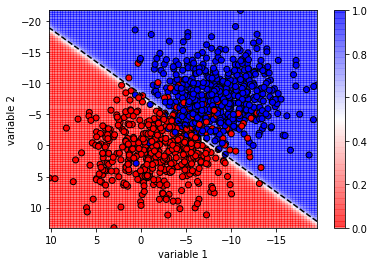

In [8]:
fig, ax = plt.subplots()
plot = ax.pcolor(xx1, xx2, prob, cmap = 'bwr_r', alpha =0.5)
cbar = fig.colorbar(plot)
ax.scatter(X[:,0], X[:,1], c= [colors[i] for i in y], edgecolor='k')
ax.set_xlim([np.max(X[:,0]), np.min(X[:,0])])
ax.set_ylim([np.max(X[:,1]), np.min(X[:,1])])
ax.set_xlabel('variable 1'); ax.set_ylabel('variable 2')
ax.plot(x1, (-w[0]*x1-b)/w[1], ls ='--', c='k')